# Please read:

We have already defined the dataset below. 
And also have defined X_train and y_train. Please build a model and test it with X_test.


You should build a neural network model in Keras.

# Section A

In [1]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

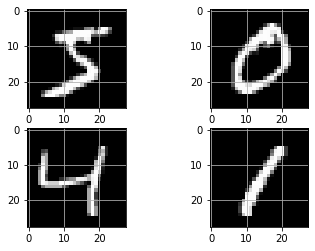

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [3]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

# Section B - HW Neural Network starts here

In [4]:
# 1. Import the relevant packages and datasets
from keras import utils # For preprocessing of the targets 
from keras import optimizers # For selecting optimization of loss function
from keras import layers # For layer building and Flattening
import keras
import numpy as np

In [5]:
#X_train.shape
X_train.shape
# Making sure training data is condensed to float 32-bit value and within 255 range
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255 

# Make sure images have shape (28, 28, 1) to pass through layers
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

In [6]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
#We shall be minimizing categorical cross entropy loss

#- 2points

In [7]:
# Using keras to_categorical to transform targets
# Reshape data into row-column form and fit-transform with one-hot-encoding
y_train_encode = utils.to_categorical(y_train, num_classes=10)
y_test_encode = utils.to_categorical(y_test, num_classes=10)
print(y_test_encode)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
y_test_encode.shape

(10000, 10)

In [9]:
#3. Initialize a model - 1 point

In [10]:
model = Sequential() # Using sequential model

# Define the model architecture:
- Specify the number of units in a hidden layer
- Specify the activation function that is to be performed in a hidden layer
- Specify the number of hidden layers
- Specify the loss function that we want to minimize
- Provide the optimizer that will minimize the loss function

In [11]:
# Input layer specified with data input shape
model.add(keras.Input(shape=(28,28,1)))
# Creating 2D convolution layer with specified output and convolution window height and width
layers.Conv2D(32, kernel_size=(3, 3), activation="relu")
# Downsampling the input resolution
layers.MaxPooling2D(pool_size=(2, 2))
# Flattening input layers into single dimension for network
model.add(keras.layers.Flatten())
# Creating dense layer with specified output of 10 for classes
model.add(Dense(10, activation='softmax'))

# Optimizer
ada = optimizers.Adam(learning_rate=0.01)
# Compiling the loss function with the optimizer
model.compile(loss="categorical_crossentropy", optimizer=ada, metrics=["accuracy"])
print(model.summary())

# Credit to: https://keras.io/examples/vision/mnist_convnet/

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#5. Fit the model 

In [13]:
# Specifying 20 training epoch runs and want progress to not show up
model.fit(x_train, y_train_encode, epochs=20, verbose=False)

In [14]:
#6. Test the model

In [15]:
score = model.evaluate(x_test, y_test_encode, verbose=0)

In [16]:
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [17]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 65.33076477050781
Test accuracy: 0.888700008392334


In [18]:
del y_test, x_test, y_train, x_train # Clearing vars for next section

# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Refer to the demo - decision trees & write your code to calculate Entropy - 5 points

In [19]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train, y_test): # Adding y_test so as to perform accuracy test in funct
  
    # Decision tree with entropy 
    
    # Creating the classifier object with splitting criterion set to entropy and same pruning strategies as other
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
  
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)     

### Below is copy of Demo 5 code so as to test code above for correctness

In [20]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

  
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 

In [21]:
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
 

In [22]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train, y_test) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 


In [23]:
# Calling main function 
if __name__=="__main__": 
    main() 

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 6

/Users/jacobrodriguez/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobrodriguez/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
